In [24]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import time
import matplotlib.pyplot as plt
import json

In [58]:
cleaned_data = pd.read_csv('../data/processed_movies_1.csv')
cleaned_data = cleaned_data.drop(columns=['Unnamed: 0'])

In [59]:
cleaned_data.head()

,genre_ids,id,overview,popularity,release_date,title,vote_average,vote_count,budget,imdb_id,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,"[878, 28, 12]",912649,Eddie and Venom are on the run. Hunted by both...,3197.278,2024-10-22,Venom: The Last Dance,6.500,759,120000000,tt16366836,...,False,False,False,False,False,True,False,False,False,False
1,"[27, 53, 9648]",1034541,Five years after surviving Art the Clown's Hal...,2204.248,2024-10-09,Terrifier 3,6.925,1012,2000000,tt27911000,...,False,True,False,True,False,False,False,True,False,False
2,"[16, 878, 10751]",1184918,"After a shipwreck, an intelligent robot called...",1868.856,2024-09-12,The Wild Robot,8.500,2899,78000000,tt29623480,...,False,False,False,False,False,True,False,False,False,False
3,"[28, 12, 18]",558449,Years after witnessing the death of the revere...,1978.412,2024-11-13,Gladiator II,6.800,400,310000000,tt9218128,...,False,False,False,False,False,False,False,False,False,False
4,"[28, 35, 878]",533535,A listless Wade Wilson toils away in civilian ...,1490.952,2024-07-24,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,...,False,False,False,False,False,True,False,False,False,False


In [60]:
cleaned_data.shape, cleaned_data.dtypes

((2002, 45),
 genre_ids                                 object
 id                                         int64
 overview                                  object
 popularity                               float64
 release_date                              object
 title                                     object
 vote_average                             float64
 vote_count                                 int64
 budget                                     int64
 imdb_id                                   object
 production_companies                      object
 production_countries                      object
 runtime                                    int64
 tagline                                   object
 spoken_languages                          object
 domestic_opening                         float64
 domestic_gross                           float64
 asia_pacific_opening                     float64
 asia_pacific_gross                       float64
 europe_middle_east_and_africa_openin

In [62]:
numerical_data = cleaned_data.select_dtypes(include=[np.number, np.bool_])
numerical_data.head()

,id,popularity,vote_average,vote_count,budget,runtime,domestic_opening,domestic_gross,asia_pacific_opening,asia_pacific_gross,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,912649,3197.278,6.500,759,120000000,109,51012404.0,128094490.0,12669884.0,37742128.0,...,False,False,False,False,False,True,False,False,False,False
1,1034541,2204.248,6.925,1012,2000000,125,18928113.0,53981071.0,1201876.0,4909632.0,...,False,True,False,True,False,False,False,True,False,False
2,1184918,1868.856,8.500,2899,78000000,102,35790150.0,137913995.0,4513231.0,26267130.0,...,False,False,False,False,False,True,False,False,False,False
3,558449,1978.412,6.800,400,310000000,148,NaN,NaN,9200000.0,9200000.0,...,False,False,False,False,False,False,False,False,False,False
4,533535,1490.952,7.700,5465,200000000,128,211435291.0,636745858.0,54693311.0,154480407.0,...,False,False,False,False,False,True,False,False,False,False


In [64]:
numerical_data.describe()

,id,popularity,vote_average,vote_count,budget,runtime,domestic_opening,domestic_gross,asia_pacific_opening,asia_pacific_gross,europe_middle_east_and_africa_opening,europe_middle_east_and_africa_gross,latin_america_opening,latin_america_gross,domestic,international,worldwide
count,2.002000e+03,2002.000000,2002.000000,2002.000000,2.002000e+03,2002.000000,1.549000e+03,1.549000e+03,1.571000e+03,1.571000e+03,1.630000e+03,1.630000e+03,1.234000e+03,1.234000e+03,2.002000e+03,2.002000e+03,2.002000e+03
mean,4.150167e+05,69.586541,6.619838,2826.715285,4.254863e+07,108.855644,1.928508e+07,6.475988e+07,6.385599e+06,2.377129e+07,8.676906e+06,3.568145e+07,3.485657e+06,1.395196e+07,5.010523e+07,7.276452e+07,1.229328e+08
std,4.112744e+05,143.036182,0.839639,3270.556427,5.694636e+07,20.621252,2.504412e+07,7.885152e+07,1.133660e+07,4.191161e+07,1.426460e+07,5.720974e+07,6.489765e+06,2.293098e+07,7.446293e+07,1.287888e+08,1.958085e+08
min,1.400000e+01,15.491000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,7.430000e+02,0.000000e+00,2.500000e+01,0.000000e+00,1.930000e+02,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,1.930000e+02
25%,1.371675e+04,30.177750,6.144000,361.750000,0.000000e+00,95.000000,2.493020e+06,1.213856e+07,2.188770e+05,1.046321e+06,3.406702e+05,1.363684e+06,1.404988e+05,1.513867e+06,4.459475e+04,1.124684e+06,5.384521e+06
50%,2.996105e+05,41.049500,6.667500,1762.000000,2.000000e+07,106.000000,1.269142e+07,4.427735e+07,2.052801e+06,8.879125e+06,3.399630e+06,1.463141e+07,1.104038e+06,5.920086e+06,2.501064e+07,2.319798e+07,4.981575e+07
75%,7.854275e+05,62.952750,7.187500,4061.250000,6.000000e+07,119.000000,2.553482e+07,8.976096e+07,7.536020e+06,2.885155e+07,1.133499e+07,4.685712e+07,4.022151e+06,1.633926e+07,7.059916e+07,9.014294e+07,1.648655e+08
max,1.320637e+06,3197.278000,10.000000,25585.000000,4.600000e+08,209.000000,3.571150e+08,8.583730e+08,1.623613e+08,5.378764e+08,2.003668e+08,7.518936e+08,8.020204e+07,2.728488e+08,8.583730e+08,1.941066e+09,2.799439e+09


<Axes: >

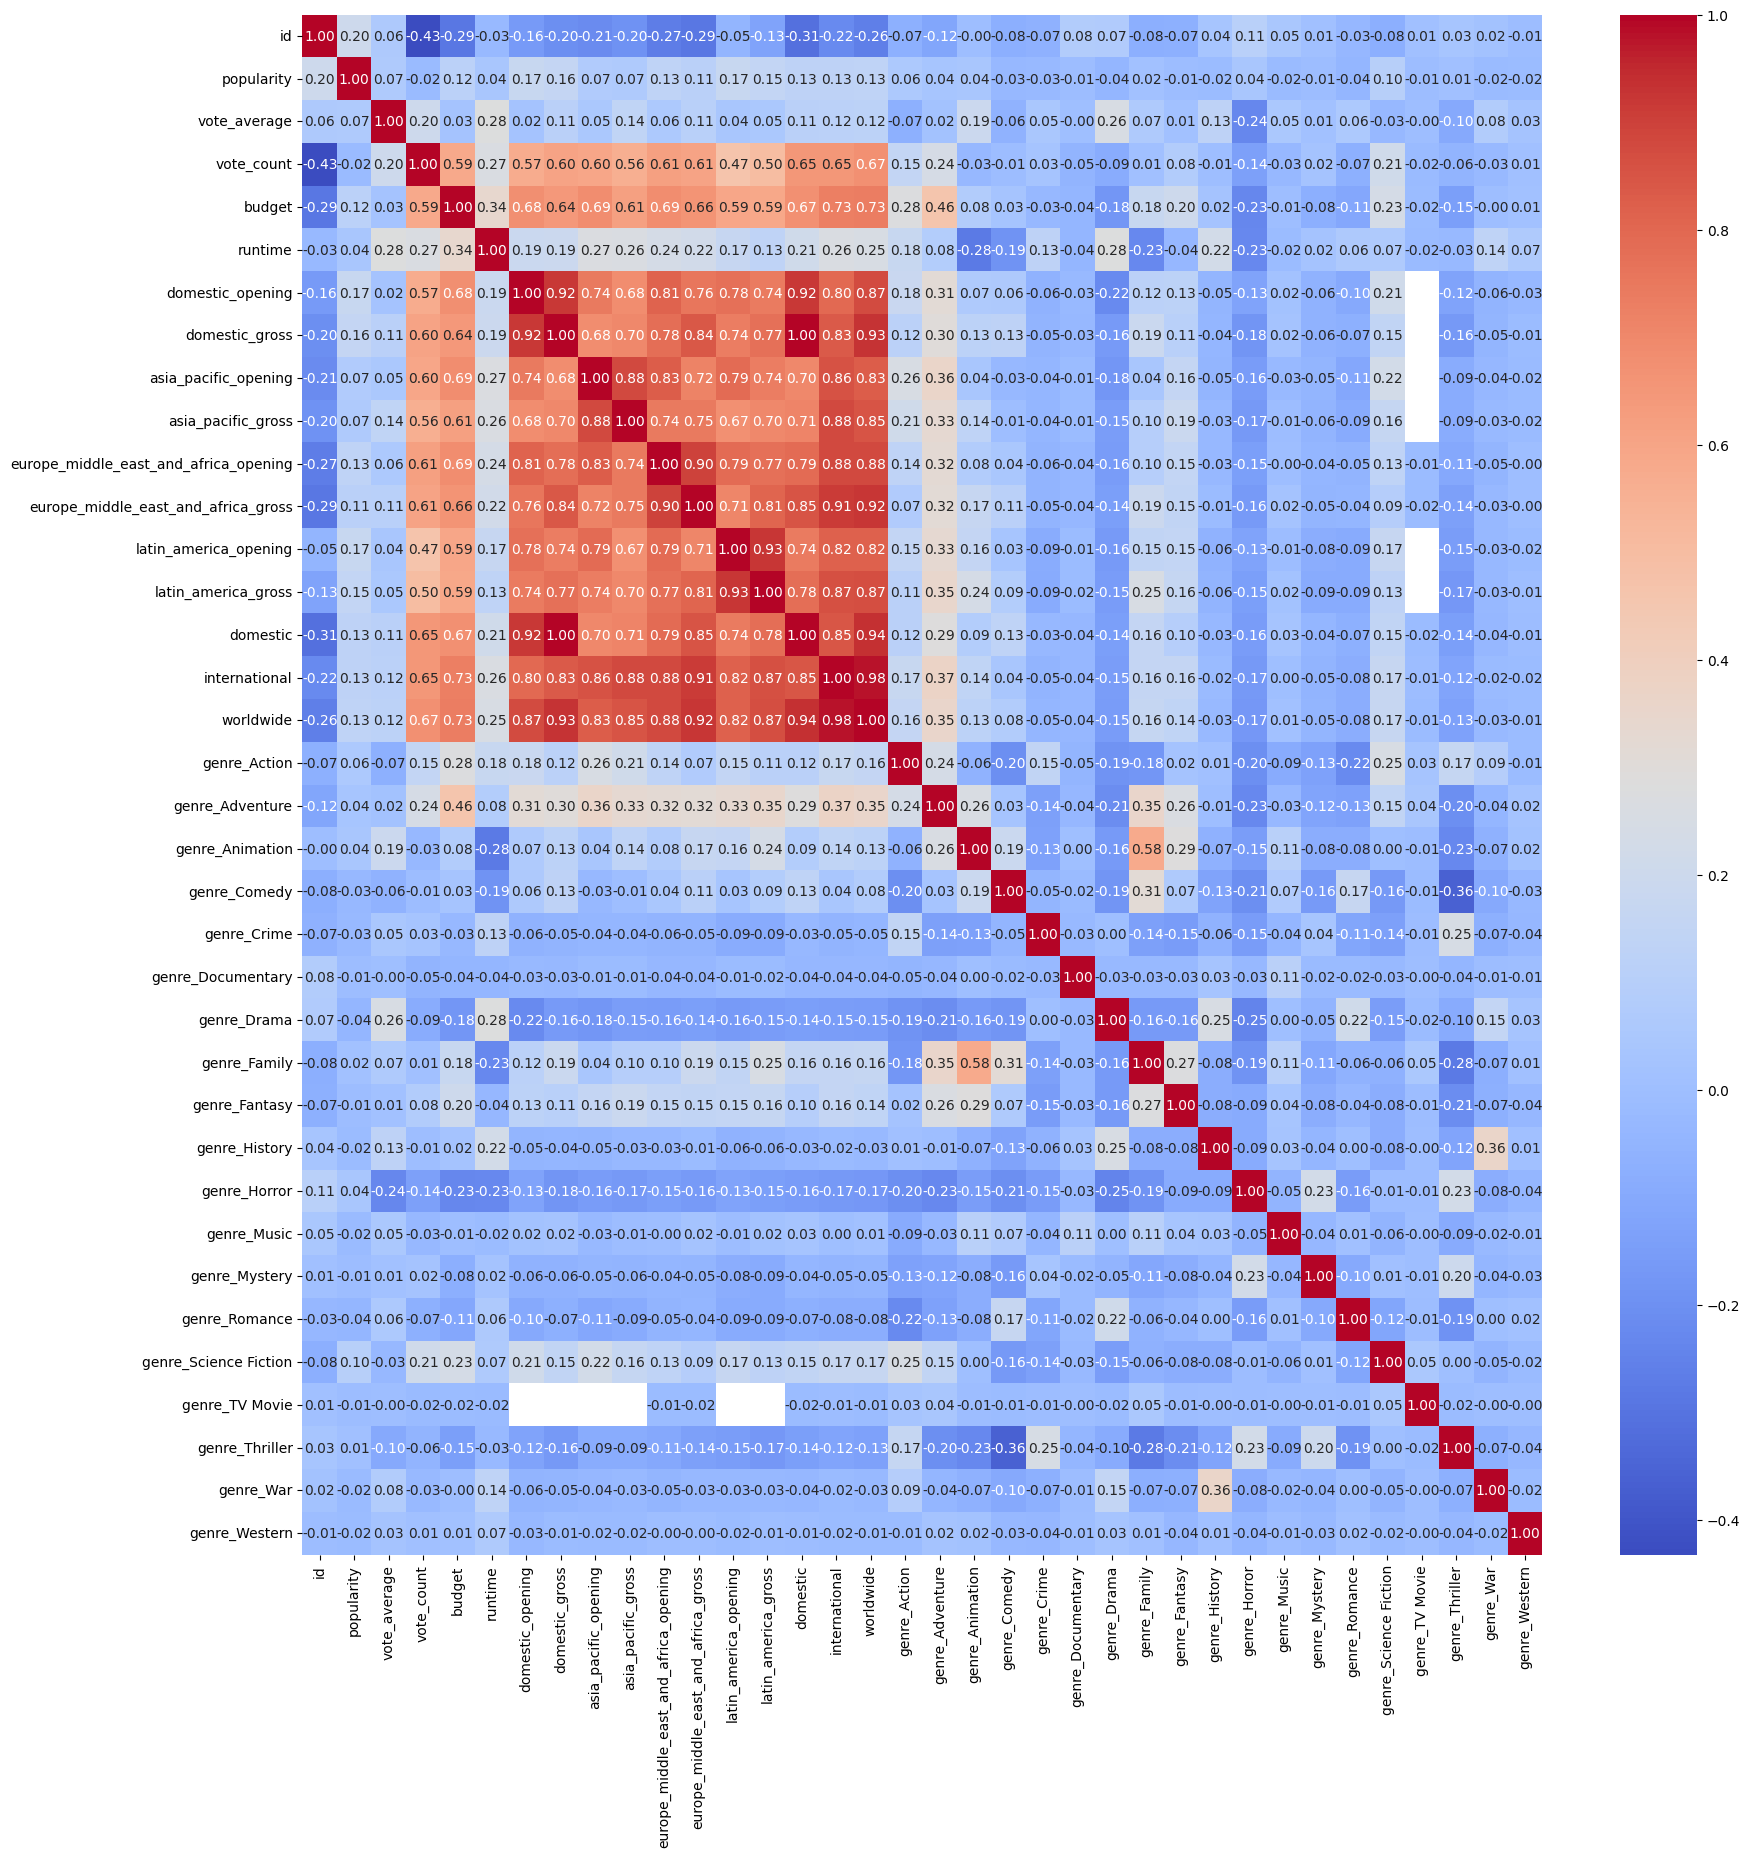

In [67]:
plt.figure(figsize=(20, 20))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')